<a href="https://colab.research.google.com/github/martelbrayan0-collab/regresiones/blob/main/Regresion_diabetes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels


In [ ]:
import numpy as np# esta es una libreria para operaciones numericas y arrays
import pandas as pd# manipulacion de datos tipo data frame
from scipy import stats
#para el alfa de cronbach
import pingouin as pg
#para graficos
import matplotlib.pyplot as plt# libreria de graficos
import seaborn as sns
#para matrices de correlacion
import seaborn as sns
#sns.pairplot(df)
#para data set y regresion
import statsmodels.api as sm #libreria para modelos estadisticos
# pruebas de serie de tiempo
from statsmodels.tsa.stattools import adfuller
#para leer csv
import pandas as pd
#ejemplo df=pd.read_csv("archivo.csv")
#para las pruebas de breusch pagan y durbin watson
from statsmodels.stats.diagnostic import het_breuschpagan#prueba de heterocedasticidad
from statsmodels.stats.stattools import durbin_watson#prueba de autocorrelacion



Carga de la base de datos

In [ ]:
import pandas as pd
datos=pd.read_csv("diabetes.csv")
datos.head()

,numero de paciente,genero,colesterol,glucosa,colesterol bueno,frecuencia c.,edad,altura,peso,cintura,cadera,masa corporak,diabetes
0,1,female,193,77,49,118,19,61,119,32,38,22.5,No diabetes
1,2,female,146,79,41,108,19,60,135,33,40,26.4,No diabetes
2,3,female,217,75,54,110,20,67,187,40,45,29.3,No diabetes
3,4,female,226,97,70,122,20,64,114,31,39,19.6,No diabetes
4,5,female,164,91,67,122,20,70,141,32,39,20.2,No diabetes


analisis de las variables del data frame

In [ ]:
datos.info()
datos.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   numero de paciente  390 non-null    int64  
 1   genero              390 non-null    object 
 2   colesterol          390 non-null    int64  
 3   glucosa             390 non-null    int64  
 4   colesterol bueno    390 non-null    int64  
 5   frecuencia c.       390 non-null    int64  
 6   edad                390 non-null    int64  
 7   altura              390 non-null    int64  
 8   peso                390 non-null    int64  
 9   cintura             390 non-null    int64  
 10  cadera              390 non-null    int64  
 11  masa corporak       390 non-null    float64
 12  diabetes            390 non-null    object 
dtypes: float64(1), int64(10), object(2)
memory usage: 39.7+ KB


Index(['numero de paciente', 'genero', 'colesterol', 'glucosa',
       'colesterol bueno', 'frecuencia c.', 'edad', 'altura', 'peso',
       'cintura', 'cadera', 'masa corporak', 'diabetes'],
      dtype='object')

analisis descriptivo de la variable x


In [ ]:
x=datos["edad"]
np.mean(x)
np.std(x)
np.std(x,ddof=1)/np.mean(x)*100

np.float64(35.13872098604047)

histograma de la variable edad para verificar que sigue una distribucion normal

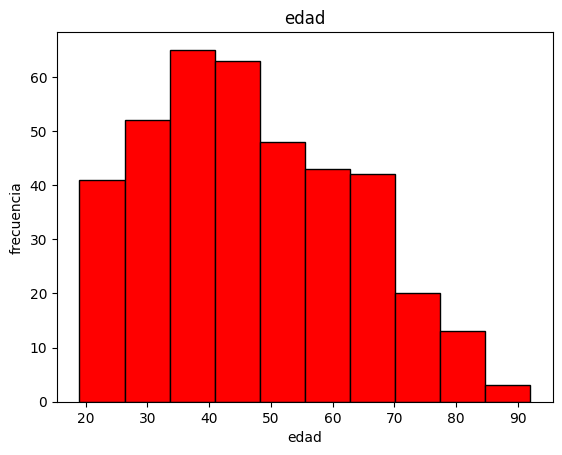

In [ ]:
import matplotlib.pyplot as plt

plt.hist(x,color="red",edgecolor="black")
plt.title("edad")
plt.xlabel("edad")
plt.ylabel("frecuencia")
plt.show()

analisis de la var Y

In [ ]:
y=datos["colesterol"]
np.mean(y)
np.std(y,ddof=1)
np.std(y,ddof=1)/np.mean(y)*100

np.float64(21.553751508866657)

histograma de la var Y


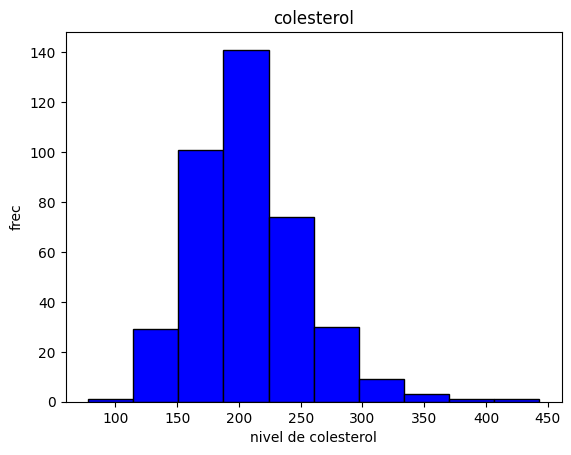

In [ ]:
plt.hist(y,color="blue",edgecolor="black")
plt.title("colesterol")
plt.xlabel("nivel de colesterol")
plt.ylabel("frec")
plt.show()


correlacion

In [ ]:
np.corrcoef(x,y)[0,1]

np.float64(0.24733346956273286)

In [ ]:
print(np.corrcoef(x,y)[0,1])
datos[["edad","colesterol"]].corr()


0.24733346956273286


,edad,colesterol
edad,1.000000,0.247333
colesterol,0.247333,1.000000


Regresion lineal

In [ ]:
import statsmodels.api as sm
X=sm.add_constant(x)
modelo=sm.OLS(y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             colesterol   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     25.28
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           7.58e-07
Time:                        20:27:14   Log-Likelihood:                -2022.3
No. Observations:                 390   AIC:                             4049.
Df Residuals:                     388   BIC:                             4056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.7914      6.627     26.528      0.0

Grafico de regresion

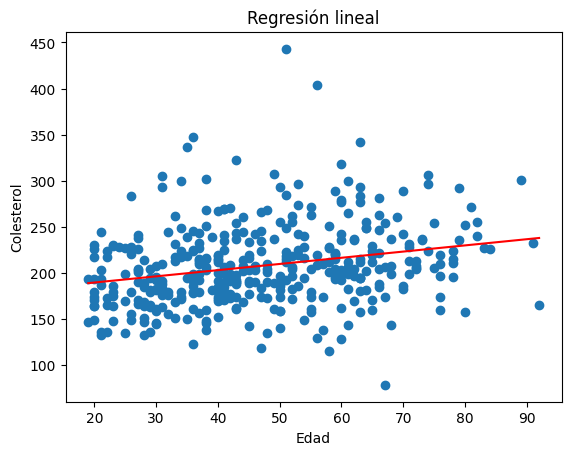

In [ ]:
plt.scatter(x, y)
plt.plot(x, modelo.predict(X), color="red")
plt.xlabel("Edad")
plt.ylabel("Colesterol")
plt.title("Regresión lineal")
plt.show()


analisis de residuales

In [ ]:
er = modelo.resid
er.head()


,0
0,4.437766
1,-42.562234
2,27.765616
3,36.765616
4,-25.234384


prueba de normalidad
prueba de autocorrelacion
prueba de indepencia o heterocedasticidad

In [ ]:
from scipy.stats import shapiro

shapiro(er)


ShapiroResult(statistic=np.float64(0.952946353494309), pvalue=np.float64(8.012822044582862e-10))

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(er)


np.float64(2.1137295445988467)

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

het_breuschpagan(er, X)


(np.float64(1.2559396126537181),
 np.float64(0.2624210681771959),
 np.float64(1.2535357304857508),
 np.float64(0.2635708440815268))

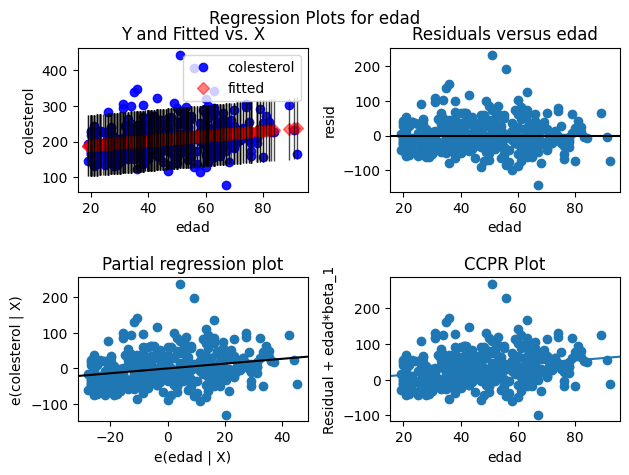

In [ ]:
sm.graphics.plot_regress_exog(modelo, "edad")
plt.show()


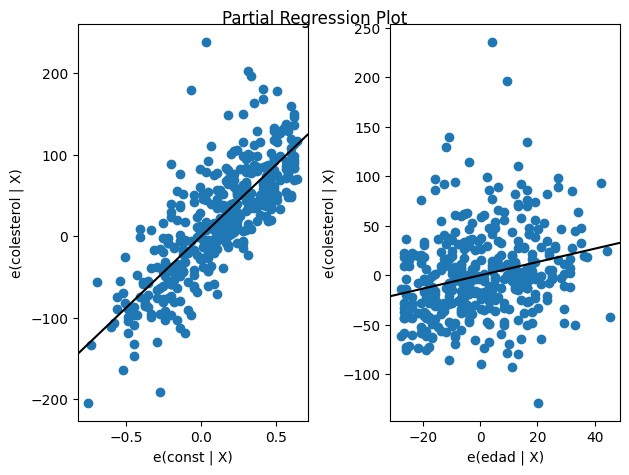

In [ ]:
sm.graphics.plot_partregress_grid(modelo)
plt.show()


eliminacion de datos atipicos para observar si hay mejor ajuste


In [ ]:
indices = [242, 272, 341]

datos2 = datos.drop(index=indices)

x2 = datos2["edad"]
y2 = datos2["colesterol"]

X2 = sm.add_constant(x2)
modelo2 = sm.OLS(y2, X2).fit()

print(modelo2.summary())


                            OLS Regression Results                            
Dep. Variable:             colesterol   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     29.56
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           9.64e-08
Time:                        20:28:41   Log-Likelihood:                -1976.2
No. Observations:                 387   AIC:                             3956.
Df Residuals:                     385   BIC:                             3964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.0117      6.130     28.552      0.0

pruebas nuevo modelo

In [ ]:
err = modelo2.resid

shapiro(err)
durbin_watson(err)
het_breuschpagan(err, X2)


(np.float64(0.5140550364162154),
 np.float64(0.4733887111026026),
 np.float64(0.5120786191562164),
 np.float64(0.4746741779640212))